#Ránking de investigadores en Informática en la UGR

In [1]:
%matplotlib inline
from BeautifulSoup import BeautifulSoup
import urllib2
from IPython.display import ( 
    display, HTML 
)
import matplotlib.pyplot as plt


url = 'http://investigacion.ugr.es/ugrinvestiga/static/BuscadorRanking/*/buscar?tipo=&rama_c=&disciplina_c=TELE_D&especialidad_c=&indicador=&periodo='
response = urllib2.urlopen( url )
html= response.read()
all_data = BeautifulSoup( html )
investigadores = all_data.find( "table" ).findAll( "tr" )

Los datos han sido descargados de [la web de la UGR](http://investigacion.ugr.es/ugrinvestiga/static/BuscadorRanking/*/buscar?tipo=&rama_c=&disciplina_c=TELE_D&especialidad_c=&indicador=&periodo=')
usando `urllib2`
A continuación se muestra la tabla descargada

In [2]:
output = "<table>"
h_data = []
for row in investigadores[1:]:
    columnas = row.findAll('td')
    rank =  int(columnas[0].string.strip())
    nombre =  columnas[1].find('a').string.strip()
    citas =  int(columnas[2].find('strong').string.strip())
    h =  int(columnas[3].string.strip())
    output += "<tr><td>"+nombre+"</td><td>"+str(citas)+"</td><td>"+str(h)+"</td></tr>"
    h_data.append( h )
    
output += "</table>"
display(HTML(output))

FRANCISCO HERRERA TRIGUERO,37054,99
ENRIQUE HERRERA VIEDMA,15581,61
JOSE LUIS VERDEGAY GALDEANO,9623,43
OSCAR CORDON GARCIA,9072,45
MARIA AMPARO VILA MIRANDA,6031,39
MANUEL LOZANO MARQUEZ,4893,25
SALVADOR GARCIA LOPEZ,4701,29
JUAN JULIAN MERELO GUERVOS,4619,25
JUAN LUIS CASTRO PEÑA,4123,31
SERAFIN MORAL CALLEJON,3986,35
LUIS MIGUEL DE CAMPOS IBAÑEZ,3787,35


El siguiente gráfico muestra el número H de los investigadores por orden decreciente

<function matplotlib.pyplot.show>

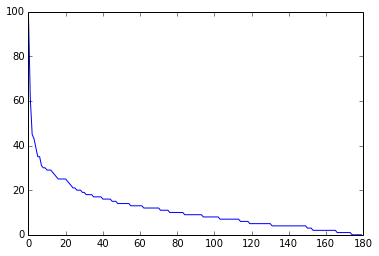

In [3]:
h_data.sort()
h_data.reverse()
plt.plot(h_data)
plt.show